# Python for Data Science 

#### AAWG Dev Day 6/14/2019 

------------


First, lets look at the basic data types. 

### Lists 

Lists are the most simple collection of data objects. You can mix and match within a list, but this will create problems sometimes. Generally you should keep a single list to the same type (number vs text). 

You can start a new empy list like this, and then use the `append` function to add items to the list: 

In [1]:
l = [] 
l.append('item 1')
l

['item 1']

Or you can initiate a list with data already in it. Here are several lists we'll reuse below. Note there are mixed data types. 

**See if you can deduce what assumptions/choices python is making when we do this.** 

In [2]:
first_name = ['Jason', 'Molly', 'Tina', 'Jake', 'Amy']
last_name = ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'] 
age = [42, 52, 36, 24, 73] 
preTestScore = [4, 24, 31, ".", "."]
postTestScore = ["25,000", "94,000", 57, 62, 70]

Now that we have lists, we need to learn to extract information from them. We can do this with simple indexing, which in python begins with 0 (not 1). 

**What is the `[-1]` index doing?** 

**Print the list in reverse order?**  
 
**Print all but the first** 

In [3]:
first_name[0]
# first_name[0:1]
# first_name[2:]
# first_name[-1]

'Jason'

### DataFrames

For data science jobs, lists are usually a starting place, but sometimes not useful by themselves. So next we can put them into a `pandas` **DataFrame** object. **This is the canonical data science format, so knowing DF is crucial!** 

First, we need the `pandas` library. This will essentially always be used for data science jobs in python. 

In [4]:
import pandas as pd 

There are multiple ways to get lists into a DF. Here is an example of using the `zip` function to *zipper* together multiple lists. 

In [5]:
df = pd.DataFrame(list(zip(first_name, last_name, age)), 
                  columns=['first_name', 'last_name', 'age'])
df

,first_name,last_name,age
0,Jason,Miller,42
1,Molly,Jacobson,52
2,Tina,.,36
3,Jake,Milner,24
4,Amy,Cooze,73


**Create a 1-column DataFrame out of a single list.** 

### Dictionaries 

Dictionaries are the second essential data structure you'll need for data science in python. These are kind of like lists, but are based on a `{key: data}` structure. 

In [6]:
d = {'key': [1, 2, 3]}
d['key']

[1, 2, 3]

Notice you can retrieve data using key words, and dictionaries can be much more complex than lists. 

**See if you can add another key and associated data into the `d` dict we created above.**

**Are there any limitations? Does it need to be the same length as the original key+data? How about mixing data types?**


Next, let's reproduce the first/last name DataFrame using a dictionary this time. 

**What is the `columns` arg doing? What happens if you rearrange the column order.**

In [7]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, ".", "."],
            'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data, 
                  columns = ['first_name', 
                             'last_name', 
                             'age', 
                             'preTestScore', 
                             'postTestScore'], 
                 index = ['a', 'b', 'c', 'd', 'e'])
df

,first_name,last_name,age,preTestScore,postTestScore
a,Jason,Miller,42,4,"25,000"
b,Molly,Jacobson,52,24,"94,000"
c,Tina,.,36,31,57
d,Jake,Milner,24,.,62
e,Amy,Cooze,73,.,70


In [8]:
df.iloc[1]

first_name          Molly
last_name        Jacobson
age                    52
preTestScore           24
postTestScore      94,000
Name: b, dtype: object

In [9]:
df.loc['b']

first_name          Molly
last_name        Jacobson
age                    52
preTestScore           24
postTestScore      94,000
Name: b, dtype: object

**Print the first and third columns together**

**Print the last name `Milner`** 

**Now do the same thing with a slightly different command** 

In [10]:
df.iloc[:, [0, 2]]

,first_name,age
a,Jason,42
b,Molly,52
c,Tina,36
d,Jake,24
e,Amy,73


In [11]:
df.loc['d', 'last_name']

'Milner'

#### Tuples 

... Are generally not necessary in data science workstreams. But you will occasionally run into them, so best to understand how to deal. If you remember anything from today, don't let it be tuples. 

In [12]:
t1 = (1, 4, ['this', 'that', 'the other'])
t2 = (2, 5, 7)

In [13]:
t1[2][1]

'that'

**Replace 'this' with something else.**

**Then replace 4 with something else. ?!?!?** 

**Just for fun throw a pandas DataFrame into one of your tuples. Why not?**

Tuples can be turned into lists or dicts, and then you can cycle through them like you would other data structures. 

In [14]:
t3 = [t1, t2]
t3

[(1, 4, ['this', 'that', 'the other']), (2, 5, 7)]

Now that we have a list of tuples, we can pull the 2nd element from each one. 

In [15]:
[t[1] for t in t3]

[4, 5]

### Changing data in a DataFrame

The print commands above don't actually change the DF. Sometimes it is important to replace/remove/add data. 

Run the commands below, and see what happens. Is this what you expected to happen? 


In [16]:
df_trimmed = df.iloc[1:3, :]
df_trimmed.loc['c', 'age'] = 15

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
df

,first_name,last_name,age,preTestScore,postTestScore
a,Jason,Miller,42,4,"25,000"
b,Molly,Jacobson,52,24,"94,000"
c,Tina,.,15,31,57
d,Jake,Milner,24,.,62
e,Amy,Cooze,73,.,70


**Ok, now see if you can find one of the many ways to change data in just a *copy* of your DataFrame**

In [18]:
df_copy = df.copy()
df_copy.loc['c', 'age'] = 21

In [19]:
df

,first_name,last_name,age,preTestScore,postTestScore
a,Jason,Miller,42,4,"25,000"
b,Molly,Jacobson,52,24,"94,000"
c,Tina,.,15,31,57
d,Jake,Milner,24,.,62
e,Amy,Cooze,73,.,70


Congrats! Now that you figured that out, you have a version control problem... 
So there is a good reason why python developers made that difficult. 

But you know how to do it when you need to. 

In reality, you might want to make a habit of creating a raw, untouched copy each time you begin transforming your data. That way it is handy in case you make mistakes. Then you can always come back to the original. But generally avoid making lots of copies of your data!! 


There are **lots and lots** of important operations that `numpy` and `pandas` can do. 
We've just scratched the surface. 
When you need more, you'll get really comfortable with package documentation and StackOverflow! 

### Dealing with files

Reading data into python can be a pain. Luckily `pandas` has nice functions to smooth the process. 

First, orient within the file system. Note that Colab gives us a temporary directory.

In [22]:
!pwd

/Users/james.meadow/Desktop/aawg


In [23]:
!ls

AAWG.ipynb   test_df.csv  test_df.db   test_df.xlsx


#### CSV

In [24]:
df.to_csv('test_df.csv')

Remove the data frame just to illustrate that it is gone. 

In [25]:
del df
df

NameError: name 'df' is not defined

In [26]:
df = pd.read_csv('test_df.csv', index_col=0)

In [27]:
df

,first_name,last_name,age,preTestScore,postTestScore
a,Jason,Miller,42,4,"25,000"
b,Molly,Jacobson,52,24,"94,000"
c,Tina,.,15,31,57
d,Jake,Milner,24,.,62
e,Amy,Cooze,73,.,70


#### Excel

In [28]:
df.to_excel('test_df.xlsx') #, index=0)

In [29]:
df = pd.read_excel('test_df.xlsx') #, index_col = 0)

In [30]:
df

,first_name,last_name,age,preTestScore,postTestScore
a,Jason,Miller,42,4,"25,000"
b,Molly,Jacobson,52,24,"94,000"
c,Tina,.,15,31,57
d,Jake,Milner,24,.,62
e,Amy,Cooze,73,.,70


#### SQL database

In [31]:
from sqlalchemy import create_engine

In [32]:
engine = create_engine('sqlite:///test_df.db', echo=False)

In [33]:
engine.execute('DROP TABLE IF EXISTS users;')
df.to_sql('users', con=engine)

In [34]:
df = pd.read_sql_query("SELECT * FROM users", engine, index_col='index')

# df.index.name = None 
df

,first_name,last_name,age,preTestScore,postTestScore
index,,,,,
a,Jason,Miller,42,4,"25,000"
b,Molly,Jacobson,52,24,"94,000"
c,Tina,.,15,31,57
d,Jake,Milner,24,.,62
e,Amy,Cooze,73,.,70


Notice that the name of the index is now visible. It is still just an index, but now you can call it by name. 

**See if you can remove the name `index` from the index column so the table prints out just like it did a few cells above.**

### Looping

Often in python, the fastest and most efficient way to do something with data is to loop through. Not always! But often. All python workloads will have a bit of looping. There are multiple ways to make it happen. 

First, let's loop through a list the most common way. 

In [35]:
first_name = ['Jason', 'Molly', 'Tina', 'Jake', 'Amy']

In [36]:
for name in first_name: 
    print(name) 

Jason
Molly
Tina
Jake
Amy


There is a really powerful complex way to do something simple in a loop. This is known as 'list comprehension'. Get good at it! 

In [37]:
[print(name) for name in first_name]

Jason
Molly
Tina
Jake
Amy


[None, None, None, None, None]

Note that this creates a little empty list as an artifact. That's because we're using the `[]` list brackets but not putting anything in them. List comprehension is most useful when creating a list by doing something simple to another list or other group of objects: 

In [38]:
['first name = ' + name for name in first_name]

['first name = Jason',
 'first name = Molly',
 'first name = Tina',
 'first name = Jake',
 'first name = Amy']

Sometimes there is not a known finite number of times we need to do something. So instead of traditional looping, we can keep doing a thing until we get the result we want: 

In [39]:
not_amy = True
i = 0
while first_name[i] != 'Amy': 
    print('first name = ' + first_name[i])
    i += 1
    

first name = Jason
first name = Molly
first name = Tina
first name = Jake


### `if` statements

You essentially always need some sort of if decision logic during a project there are many ways to do it. Here are some simple examples. 

In [40]:
if 'Jake' in first_name: 
    print('Found Jake!')

Found Jake!


In [41]:
if 'James' not in first_name: 
    print('James is missing')

James is missing


In [42]:
if 'James' in first_name: 
    print('Found James!')
elif 'Jake' in first_name: 
    print('Found Jake!')
else: 
    print('found nothing.')

Found Jake!


### More about Data Frames and their Framed Data

The reason to get data quickly into `pandas` is so that you can use the fabulous selection of data-manipulation and stats functions on your data. Here are a few simple examples using some datasets already loaded into the data science packages. 

In [43]:
from sklearn import datasets

In [44]:
iris_data = datasets.load_iris()


**What format is the iris dataset by default?**

**Can you turn it into a DataFrame named `df`?**

In [45]:
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

The `iris` table is a classic plant physiology dataset that is often used to test ML clustering and classification algorithms. 

In [46]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
df.shape

(150, 4)

In [48]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [50]:
df_big_sepal = df[df['sepal length'] > 7]
df_big_sepal

,sepal length,sepal width,petal length,petal width
102,7.1,3.0,5.9,2.1
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
109,7.2,3.6,6.1,2.5
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
125,7.2,3.2,6.0,1.8
129,7.2,3.0,5.8,1.6
130,7.4,2.8,6.1,1.9


**Now find all the rows with sepal width ALSO > 3** 

In [51]:
df_big_sepal.max()

sepal length    7.9
sepal width     3.8
petal length    6.9
petal width     2.5
dtype: float64

In [52]:
df_big_sepal['petal width'].max()

2.5

**Find the average of the second and third columns**

### Dealing with missing/bad data

Almost always an issue. So let's deal with it. First let's create some missing data. 

numpy has a simple NaN representation that works nicely for our needs. 

In [53]:
df['petal length'] = df['petal length'].replace(6.1, np.nan)

In [54]:
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


And then remove those entries. 

In [55]:
df = df.dropna()

In [56]:
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Grouping and summarizing your data

In [69]:
import random 
df['group'] = np.random.choice(['r', 'g', 'b'], df.shape[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
df

,sepal length,sepal width,petal length,petal width,group
0,5.1,3.5,1.4,0.2,b
1,4.9,3.0,1.4,0.2,b
2,4.7,3.2,1.3,0.2,r
3,4.6,3.1,1.5,0.2,r
4,5.0,3.6,1.4,0.2,g
5,5.4,3.9,1.7,0.4,g
6,4.6,3.4,1.4,0.3,g
7,5.0,3.4,1.5,0.2,r
8,4.4,2.9,1.4,0.2,b
9,4.9,3.1,1.5,0.1,r


In [71]:
df.groupby('group').mean()

,sepal length,sepal width,petal length,petal width
group,,,,
b,6.003774,3.039623,4.103774,1.360377
g,5.690476,3.085714,3.366667,1.007143
r,5.711538,3.048077,3.586538,1.130769


### `apply` functions

You can get much more creative about applying functions to entire columns or groups, but you'll need to pass the data through a function like `apply`. 

In [72]:
df.groupby('group').apply(lambda x: x.count())

,sepal length,sepal width,petal length,petal width,group
group,,,,,
b,53,53,53,53,53
g,42,42,42,42,42
r,52,52,52,52,52


### Plotting data

`matplotlib` will do 90% or more of the plotting you need during routine data science. There are **many, many, many** different things you can do, and it (with other fuctionality) is becoming as good as R for visualization. 

We'll just look at a super simple example here, with one simple style option envoked. Every variation of plotting in python is accessible with a quick search. 

Notice also that we're reloading a clean version of the `iris` dataset with its true response category (`species`

In [83]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
iris = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris['species'] = iris_data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


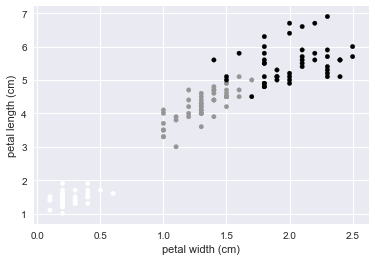

In [88]:

iris.plot(kind='scatter', x='petal width (cm)', y='petal length (cm)', color=iris['species'])
plt.show()

**Do the `sepal` variables show the same pattern?** 

### Writing functions

If your workflow is extensive at all, you'll certainly need to write efficient, readable functions that do complex operations. In general, any task that gets coded more than 2x should consider moving to a clean function. 

For example, let's do something special to some of the items in the dataset. We'll use some logic in a function. 

When writing functions and loops, pay close attention to your indention!! This matters in python. Mixed tabs and spaces will cause problems, as will any other mismatched indentions. 

In [90]:
def show_me(data, length=6): 
    ## Takes a single element, 
    ##, and prints the value 
    ## if it is greater than 
    ## the threshold `length` arg. 
    if data > length: 
        print(data)

In [91]:
for data in list(df['sepal length']): 
    show_me(data, 7)

7.1
7.6
7.3
7.7
7.7
7.7
7.2
7.2
7.9


This is just a tiny taste of python's functional programming capability. It goes **way way** deeper than this. And then there is object-oriented programming, which we don't even touch here. 

Often during a data science process, I end up with a script of small functions that do repeatable things, and then a runner script that calls those functions. Or you can put the function near the top of your notebook, and then call it below. 

Notice something really important above. The commented description tells you everything you need to know to use the function correctly. It is nota problem 